In [1]:
import os 
import json
import time
import numpy as np
import pandas as pd
from scipy.spatial import distance_matrix
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cbook as cbook
#from scipy.misc import imread
from matplotlib.pyplot import imread

from importlib import reload
%load_ext autoreload
%autoreload 2
import AnalyzeAnnotations as aa
import PlotAnnotations as pa

from tqdm import tqdm_notebook

pd.options.display.max_colwidth = 400
sns.set()

### <span style="color:red"> Load sloth jsons </span> into array of pandas dataframes

In [2]:
# load all json files from datapath into array of pandas dataframes
path = './data/20191031_MIxedSpecies_Photos_final_annotations/'
path = './data/testdata/'

df_stats, all_df, json_files = aa.loadAllJSONSFromPath(path)
print(f"{time.strftime('%d/%m/%Y, %H:%M:%S', time.localtime())}:      Path to be loaded: {path}")
print('Number of json files loaded: ' + str(len(all_df)))

12/03/2020, 13:06:23:      Path to be loaded: ./data/testdata/
Number of json files loaded: 37


#### Calculate abundance of classes + split positions + average pos column + length column + direction (rad)

In [14]:
# update df_stats with abundance of classes
df_stats = aa.getNumberOfClassesInDFs(df_stats, all_df, json_files)
# extract head and tail positions + calculate average of head and tail + calc length + calc polarization
df_allsplit = aa.splitPos(df_stats, all_df, json_files)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_stats)
print(f"\n{df_allsplit[0].head(5)}")

                                 #fish  #fish2  #fish3  #allfishes  \
IMG_5529_annotations_al.json       136       0       0         136   
IMG_5587_annotations_al.json         9       6       0          15   
IMG_5590_annotations_al.json        13       9       0          22   
IMG_5616_annotations_al_jl.json    141      15       1         157   
IMG_5643_annotations_al_jl.json    157      19       3         179   
IMG_5666_annotations_al_jl.json    166       0       0         166   
IMG_5673_annotations_al_jl.json    137       0       0         137   
IMG_5681_annotations_al_jl.json    261       0       0         261   
IMG_5688_annotations_al_jl.json     67       0       1          68   
IMG_5693_annotations_al_jl.json     78       0       0          78   
IMG_5699_annotations_al_jl.json     42       1       0          43   
IMG_5701_annotations_al_jl.json    150       1       0         151   
IMG_5712_annotations_al_jl.json    169       0       0         169   
IMG_5718_annotations

#### Stats of dataframe df_stats

In [5]:
#df.describe()
df_stats.describe()

,#fish,#fish2,#fish3,#allfishes
count,37.000000,37.000000,37.000000,37.000000
mean,79.270270,10.081081,0.378378,89.729730
std,79.761328,13.638952,0.794123,73.798392
min,0.000000,0.000000,0.000000,12.000000
25%,8.000000,0.000000,0.000000,22.000000
50%,42.000000,4.000000,0.000000,61.000000
75%,141.000000,15.000000,0.000000,142.000000
max,272.000000,44.000000,3.000000,273.000000


#### Neighbours

* Calculate distance matrix and find neighbors
 * finds neighbors using a distance matrix and filtering out neighbours over two times average length and four times average length
* Add number of class neighbors column
 * adds columns for each fish containing the number of neighbors of each class (for distance d2/av2 and d4/av4)
* Add same class neighbors percentage and average number of neighbors (per class and total) to stats 

In [22]:
df_allsplit, df_stats = aa.neighbour_calculations(df_allsplit, df_stats, json_files)

# check sample
print(df_allsplit[4].head(2))
df_stats.head(3)

5529:   Distance1 (av2): 469.03455 , Distance2 (av4): 938.06910 
5587:   Distance1 (av2): 376.00551 , Distance2 (av4): 752.01103 
5590:   Distance1 (av2): 400.39872 , Distance2 (av4): 800.79743 
5616:   Distance1 (av2): 275.37590 , Distance2 (av4): 550.75180 
5643:   Distance1 (av2): 259.67581 , Distance2 (av4): 519.35163 
5666:   Distance1 (av2): 409.56417 , Distance2 (av4): 819.12833 
5673:   Distance1 (av2): 497.67712 , Distance2 (av4): 995.35425 
5681:   Distance1 (av2): 430.66944 , Distance2 (av4): 861.33888 
5688:   Distance1 (av2): 473.61567 , Distance2 (av4): 947.23133 
5693:   Distance1 (av2): 425.80586 , Distance2 (av4): 851.61172 
5699:   Distance1 (av2): 421.57155 , Distance2 (av4): 843.14309 
5701:   Distance1 (av2): 427.88958 , Distance2 (av4): 855.77916 
5712:   Distance1 (av2): 419.00172 , Distance2 (av4): 838.00343 
5718:   Distance1 (av2): 388.25205 , Distance2 (av4): 776.50411 
5721:   Distance1 (av2): 431.39630 , Distance2 (av4): 862.79260 
5728:   Distance1 (av2): 


  class       xhead       xtail       yhead       ytail        x_av  \
0  fish  894.711757  892.919945  701.793268  838.568296  893.815851   
1  fish  742.407686  820.650170  738.824061  649.830702  781.528928   

         y_av         len   dir_rad                   nb_av2  \
0  770.180782  136.786765 -1.557697  [1, 41, 42, 45, 46, 47]   
1  694.327382  118.497697  2.291997         [0, 2, 5, 6, 45]   

                                                                                 nb_av4  \
0  [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 21, 39, 40, 41, 42, 45, 46, 47, 48, 49, 54, 55, 56]   
1              [0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 40, 41, 42, 45, 46, 47, 54, 55, 56]   

   #neighbors_av2_f  #neighbors_av2_f2  #neighbors_av2_f3  #neighbors_av4_f  \
0                 6                  0                  0                22   
1                 5                  0                  0                19   

   #neighbors_av4_f2  #neighbors_av4_f3  
0                  1                  

,#fish,#fish2,#fish3,#allfishes,avg_len,avg_dir_rad,pol,pol_error,p_av2_f_same,p_av2_f2_same,...,av2_avg_n_f,av2_avg_n_f2,av2_avg_n_f3,p_av4_f_same,p_av4_f2_same,p_av4_f3_same,av4_avg_n_total,av4_avg_n_f,av4_avg_n_f2,av4_avg_n_f3
IMG_5529_annotations_al.json,136,0,0,136,234.517274,-0.041841,0.916577,0.085749,1.000000,0.000000,...,9.308824,0.000000,0.0,1.000000,0.000000,0.0,33.720588,33.720588,0.000000,0.0
IMG_5587_annotations_al.json,9,6,0,15,188.002757,-1.848003,0.885315,0.258199,0.777778,0.333333,...,1.555556,0.333333,0.0,0.881217,0.541667,0.0,4.266667,4.888889,1.666667,0.0
IMG_5590_annotations_al.json,13,9,0,22,200.199358,-1.641929,0.953218,0.213201,0.538462,0.444444,...,2.307692,0.444444,0.0,0.814957,0.601190,0.0,4.727273,4.615385,1.555556,0.0


### Add average length, direction and polarization to stats

In [20]:
df_stats = aa.pop_stats_pol_dir_len(df_allsplit, df_stats)

df_stats.head(3)

,#fish,#fish2,#fish3,#allfishes,avg_len,avg_dir_rad,pol,pol_error,p_av2_f_same,p_av2_f2_same,...,av2_avg_n_f,av2_avg_n_f2,av2_avg_n_f3,p_av4_f_same,p_av4_f2_same,p_av4_f3_same,av4_avg_n_total,av4_avg_n_f,av4_avg_n_f2,av4_avg_n_f3
IMG_5529_annotations_al.json,136,0,0,136,234.517274,-0.041841,0.916577,0.085749,1.000000,0.000000,...,9.308824,0.000000,0.0,1.000000,0.000000,0.0,33.720588,33.720588,0.000000,0.0
IMG_5587_annotations_al.json,9,6,0,15,188.002757,-1.848003,0.885315,0.258199,0.777778,0.333333,...,1.555556,0.333333,0.0,0.881217,0.541667,0.0,4.266667,4.888889,1.666667,0.0
IMG_5590_annotations_al.json,13,9,0,22,200.199358,-1.641929,0.953218,0.213201,0.538462,0.444444,...,2.307692,0.444444,0.0,0.814957,0.601190,0.0,4.727273,4.615385,1.555556,0.0


#### Export to csv

In [ ]:
for i, df_split in enumerate(df_allsplit):
    number = data_numbers[i]
    df_split.to_csv('./output/stats/' + str(number) + '.csv')

df_stats.to_csv('./output/summary.csv')

### Plot positions

In [ ]:
#test one image
index=4
#print(json_files)

imgpath, number = pa.get_imgpath_for_json(json_files[index])
pa.plot_pos_cat_img(df_allsplit[index],imgpath, number, show=True, save=True)
pa.plot_pos_ori_cat(df_allsplit[index],imgpath, number, show=True, save=True)
pa.plot_pos_ori_cat_img(df_allsplit[index],imgpath, number, show=True, save=True)

In [13]:
# Plot positions of all read files
pa.plot(df_allsplit, json_files, SHOW=False, SAVE=True)

print(f"{time.strftime('%d/%m/%Y, %H:%M:%S', time.localtime())}")

Image 5529:  plotted positions (./data/images/IMG_5529.jpg)
Image 5529:  plotted positions and orientations with categories (./data/images/IMG_5529.jpg)
Image 5529:  plotted positions and orientations with categories on image (./data/images/IMG_5529.jpg)
Image 5587:  plotted positions (./data/images/IMG_5587.jpg)
Image 5587:  plotted positions and orientations with categories (./data/images/IMG_5587.jpg)
Image 5587:  plotted positions and orientations with categories on image (./data/images/IMG_5587.jpg)
Image 5590:  plotted positions (./data/images/IMG_5590.jpg)
Image 5590:  plotted positions and orientations with categories (./data/images/IMG_5590.jpg)
Image 5590:  plotted positions and orientations with categories on image (./data/images/IMG_5590.jpg)
Image 5616:  plotted positions (./data/images/IMG_5616.jpg)
Image 5616:  plotted positions and orientations with categories (./data/images/IMG_5616.jpg)
Image 5616:  plotted positions and orientations with categories on image (./data/i

## TODO

* rename columns
* refactor much
* convert .ipynb to .py
* create exe file from python script

In [11]:
angles = [0.163618, -0.208563, -0.246237, 0.379256, 0.189199]
angles_deg = np.degrees(angles)

print(angles_deg)

msin = np.mean(np.sin(angles))
mcos = np.mean(np.cos(angles))
np.degrees(np.arctan2(msin,mcos))




[  9.37462085 -11.94977966 -14.10834086  21.72976816  10.84030419]


3.1935405658203235

In [77]:
v = [[1, 0],[0.5, 1]]
v_normalized = preprocessing.normalize(v, norm='l1')
print(v_normalized)
v_mean_unit = np.mean(v_normalized, axis=0)
print(v_mean_unit)


ord = 2
print(np.linalg.norm(v_mean_unit, ord=ord))
print(np.square(np.linalg.norm(v_mean_unit, ord=ord)))


v = [[1, 0],[1, 0.5]]
v_normalized = preprocessing.normalize(v, norm='l1')
print(v_normalized)
v_mean_unit = np.mean(v_normalized, axis=0)
print(v_mean_unit)


ord = 2
print(np.linalg.norm(v_mean_unit, ord=ord))
print(np.square(np.linalg.norm(v_mean_unit, ord=ord)))



[[1.         0.        ]
 [0.33333333 0.66666667]]
[0.66666667 0.33333333]
0.7453559924999299
0.5555555555555556
[[1.         0.        ]
 [0.66666667 0.33333333]]
[0.83333333 0.16666667]
0.8498365855987974
0.7222222222222221


In [72]:
# v = [[0,2], [10,0], [-10,0]]
v = [[1,0], [1,1]]
print(f"pos:\n{v}")
v_normalized = preprocessing.normalize(v, norm='max')
print(f"normalized_pos:\n{v_normalized}")
v_mean = np.mean(v_normalized, axis=0)
print(f"mean normalized vector: {v_mean.tolist()}")
pol = np.linalg.norm(v_mean, ord=np.inf)
# pol = np.linalg.norm(v_mean)

print(f"pol: {pol}")

pos:
[[1, 0], [1, 1]]
normalized_pos:
[[1. 0.]
 [1. 1.]]
mean normalized vector: [1.0, 0.5]
pol: 1.0


In [66]:
# v = [[0,2], [10,0], [-10,0]]
v = [[0,1], [1,1]]

print(f"pos:\n{v}")
# # print(f"magnitudes: {np.linalg.norm(v, axis=0)}")
# v_normalized = preprocessing.normalize(v, norm='l2')
# print(f"normalized_pos:\n{v_normalized}")
# v_mean = np.mean(v_normalized, axis=0)
# print(f"mean normalized vector: {v_mean.tolist()}")
# pol = np.linalg.norm(v_mean, ord=np.inf)
# # pol = np.linalg.norm(v_mean)

unit_vectors = preprocessing.normalize(v, norm='l2')
print(f"unit vectors:\n{unit_vectors}")

mean_of_sum_of_unitv = np.mean(unit_vectors, axis=0)
print(f"mean unit vector: {mean_of_sum_of_unitv.tolist()}")

mag_meanv = np.linalg.norm(mean_of_sum_of_unitv)

pol = mag_meanv

print(f"pol: {pol}")

pos:
[[0, 1], [1, 1]]
unit vectors:
[[0.         1.        ]
 [0.70710678 0.70710678]]
mean unit vector: [0.35355339059327373, 0.8535533905932737]
pol: 0.9238795325112867


(array([ 210.,  238.,  221.,  227.,  228.,  222.,  226.,  222.,  202.,
         221.,  226.,  214.,  259.,  208.,  244.,  240.,  244.,  249.,
         306.,  305.,  313.,  310.,  335.,  362.,  340.,  404.,  458.,
         499.,  649., 1618.]),
 array([2.06959764e-04, 3.35333913e-02, 6.68598229e-02, 1.00186254e-01,
        1.33512686e-01, 1.66839118e-01, 2.00165549e-01, 2.33491981e-01,
        2.66818412e-01, 3.00144844e-01, 3.33471275e-01, 3.66797707e-01,
        4.00124138e-01, 4.33450570e-01, 4.66777001e-01, 5.00103433e-01,
        5.33429865e-01, 5.66756296e-01, 6.00082728e-01, 6.33409159e-01,
        6.66735591e-01, 7.00062022e-01, 7.33388454e-01, 7.66714885e-01,
        8.00041317e-01, 8.33367749e-01, 8.66694180e-01, 9.00020612e-01,
        9.33347043e-01, 9.66673475e-01, 9.99999906e-01]),
 <a list of 30 Patch objects>)

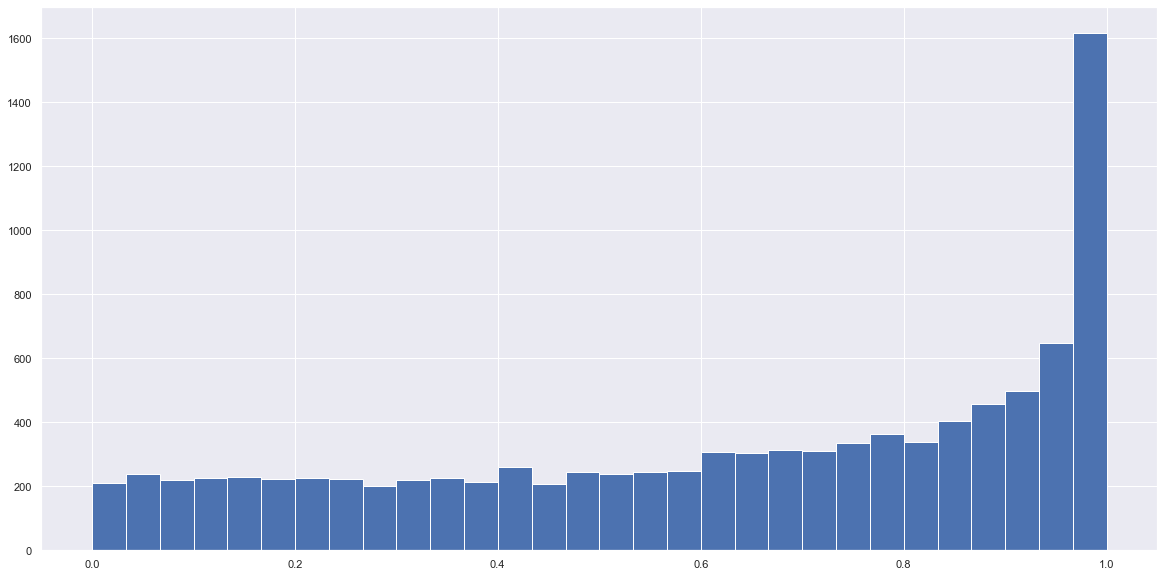

In [3]:
# v1 = np.random.rand(10000,2)
# v2 = np.random.rand(10000,2)

v1 = np.random.uniform(-1, 1, (10000, 2))
v2 = np.random.uniform(-1, 1, (10000, 2))

pols = []
for idx, v in enumerate(v1):
    twov = [v, v2[idx]]
    unit_vectors = preprocessing.normalize(twov, norm='l2')
    mean_of_sum_of_unitv = np.mean(unit_vectors, axis=0)
    mag_meanv = np.linalg.norm(mean_of_sum_of_unitv)
    pols.append(mag_meanv)
#     v_normalized = preprocessing.normalize(twov, norm='l1')
#     v_mean = np.mean(v_normalized, axis=0)
#     pol = np.linalg.norm(v_mean, ord=np.inf)
#     pols.append(pol)

    
plt.figure(figsize=(20,10))
plt.hist(pols, bins=30)


(array([ 69.,  58.,  73.,  82.,  73.,  77.,  88.,  96., 120., 264.]),
 array([9.03593523e-05, 1.00081322e-01, 2.00072284e-01, 3.00063247e-01,
        4.00054210e-01, 5.00045172e-01, 6.00036135e-01, 7.00027097e-01,
        8.00018060e-01, 9.00009022e-01, 9.99999985e-01]),
 <a list of 10 Patch objects>)

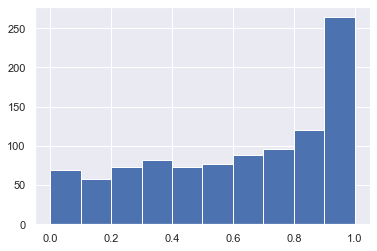

In [2]:
# https://www.sciencedirect.com/science/article/pii/S0960982217310138

v1 = np.random.uniform(-1, 1, (1000, 2))
v2 = np.random.uniform(-1, 1, (1000, 2))

pols = []

for idx, v in enumerate(v1):
    angle1 = np.arctan2(v[1], v[0])
    angle2 = np.arctan2(v2[idx][1], v2[idx][0])
    
    sm = (np.square(np.sin(angle1) + np.sin(angle2))) + (np.square(np.cos(angle1) + np.cos(angle2)))
    rt = np.sqrt(sm)
    pol = rt/2
    
    pols.append(pol)

plt.hist(pols)
    
    